# Rainfall Weather Forecasting

## Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

# Features:
1. Date  - The date of observation
2. Location  -The common name of the location of the weather station
3. MinTemp  -The minimum temperature in degrees celsius
4. MaxTemp -The maximum temperature in degrees celsius
5. Rainfall  -The amount of rainfall recorded for the day in mm
6. Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine  -The number of hours of bright sunshine in the day.
8. WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10.WindDir9am -Direction of the wind at 9am
11.WindDir3pm -Direction of the wind at 3pm
12.WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
13.WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14.Humidity9am -Humidity (percent) at 9am
15.Humidity3pm -Humidity (percent) at 3pm
16.Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
17.Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18.Cloud9am - Fraction of sky obscured by cloud at 9am. 
19.Cloud3pm -Fraction of sky obscured by cloud 
20.Temp9am-Temperature (degrees C) at 9am
21.Temp3pm -Temperature (degrees C) at 3pm
22.RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23.RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

# Target:
1. To forecast whether or not it will rain tomorrow - RainTomorrow
2. To predict how much rainfall could be there      - Rainfall  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('weatherAUS.csv')
df=shuffle(df)
df.reset_index(drop=True)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2013-12-04,Newcastle,13.6,32.0,0.0,NaN,NaN,NaN,NaN,NE,...,74.0,38.0,NaN,NaN,4.0,6.0,20.2,31.5,No,Yes
1,2016-07-06,Williamtown,9.0,15.0,0.2,4.2,NaN,NW,91.0,NW,...,52.0,53.0,1007.4,1004.5,NaN,4.0,12.7,14.3,No,Yes
2,2009-10-28,CoffsHarbour,17.0,22.6,8.6,1.4,4.0,NaN,NaN,SSW,...,84.0,60.0,1025.5,1023.1,5.0,7.0,19.4,21.5,Yes,No
3,2016-06-24,Williamtown,8.8,19.3,0.0,2.4,NaN,WNW,85.0,NW,...,47.0,30.0,1005.0,1004.4,NaN,NaN,16.6,16.3,No,No
4,2011-05-06,Brisbane,14.3,24.9,0.0,4.0,9.6,SW,19.0,SW,...,53.0,43.0,1020.4,1016.5,6.0,6.0,19.6,23.3,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-03-06,Williamtown,19.5,25.6,0.4,NaN,NaN,S,70.0,SW,...,67.0,59.0,1011.7,1011.7,7.0,1.0,21.3,24.4,No,Yes
8421,2016-07-23,Williamtown,15.0,18.9,0.0,NaN,NaN,WNW,91.0,WNW,...,34.0,26.0,1004.8,1004.8,NaN,NaN,17.8,17.7,No,No
8422,2011-08-10,Brisbane,5.6,22.8,0.0,6.0,10.1,WNW,33.0,NNE,...,45.0,25.0,1012.4,1007.4,0.0,1.0,16.4,22.3,No,No
8423,2016-09-12,Williamtown,7.0,20.4,0.0,18.4,NaN,SSE,33.0,WNW,...,70.0,68.0,1021.2,1018.4,NaN,NaN,15.6,19.3,No,No


In [3]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8425 entries, 1696 to 363
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3

# Changing Date column from object type to Date Type

In [5]:
df.Date=pd.to_datetime(df['Date'])

In [6]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# Separate Date column into day and month columns, as dataset has already one year column

In [7]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day']=df['Date'].dt.day
df.drop(columns='Date',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8425 entries, 1696 to 363
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9a

In [9]:
object_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        object_datatypes.append(i)
print(len(object_datatypes))
object_datatypes

6


['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [10]:
for i in df.columns:
    if df[i].dtypes == 'object':
        val=df[i].unique()
        nval=df[i].nunique()
        print(i ,':','\n', val , '\t\t:Total Categories:', nval, '\n')

Location : 
 ['Newcastle' 'Williamtown' 'CoffsHarbour' 'Brisbane' 'Melbourne'
 'PerthAirport' 'Adelaide' 'Albury' 'Wollongong' 'Penrith' 'Darwin'
 'Uluru'] 		:Total Categories: 12 

WindGustDir : 
 [nan 'NW' 'WNW' 'SW' 'S' 'W' 'SE' 'N' 'E' 'SSW' 'ESE' 'SSE' 'WSW' 'NE'
 'ENE' 'NNE' 'NNW'] 		:Total Categories: 16 

WindDir9am : 
 ['NE' 'NW' 'SSW' 'SW' 'NNE' 'WNW' 'WSW' 'ENE' 'S' 'N' 'ESE' 'E' nan 'SE'
 'W' 'SSE' 'NNW'] 		:Total Categories: 16 

WindDir3pm : 
 ['NE' 'NW' 'WNW' 'W' 'S' 'SW' 'ESE' 'NNE' 'N' 'SSW' 'WSW' 'SE' 'E' 'SSE'
 nan 'NNW' 'ENE'] 		:Total Categories: 16 

RainToday : 
 ['No' 'Yes' nan] 		:Total Categories: 2 

RainTomorrow : 
 ['Yes' 'No' nan] 		:Total Categories: 2 



As per observation, 
1. All categorical features have nan values, except 'Location'
2. Handle the null value using imputer technique, for this dataset.

In [11]:
numeric_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numeric_datatypes.append(i) 
        nval=df[i].nunique()
        val =df[i].unique()
        print('Numeric_Datatype Feature:',i,'\nTotal Categories:', nval,'\n' , val, '\n')
print('Total Numeric_Datatype Features:', len(numeric_datatypes))     

Numeric_Datatype Feature: MinTemp 
Total Categories: 285 
 [13.6  9.  17.   8.8 14.3 16.3 14.2 16.9 11.7 16.1  8.1 16.7  5.7 13.3
  8.2 15.5  6.  19.4  8.5  4.3 13.8 12.3  8.3 12.7 18.8 11.6  6.8  8.9
 14.8  5.8 17.2 16.   3.8 10.  13.4  5.  20.6  0.2 18.   8.7 21.  17.3
 14.  12.4 10.2 11.3 20.3 19.3 16.2  7.3 20.1 10.4  2.9  6.7 13.   7.
 13.2 16.6 22.5 21.5 12.8  6.2 15.3 10.9 20.4 10.6  6.5  2.5  3.  15.4
  4.4 18.4 24.2  4.9 14.5 23.2 21.3 10.5  9.8 17.5 23.6 19.1 20.7  4.5
 18.7 20.8 16.4 13.7 14.4 10.7  6.4 13.5  9.9  8.6  4.6  0.9 17.4 12.5
  9.2 15.6 17.9 14.6  2.6 17.8 11.4 21.2  2.8  2.2 11.2 14.1  7.4  8.
 15.1  5.9  7.2  9.1  1.1 25.   4.  24.5  9.6 12.6  9.7 14.9 11.8 11.1
  5.5 17.7 15.7  2.1  5.1  3.1  3.2 16.8  4.2 11.9 15.9 17.1 22.1 10.8
 12.  16.5 14.7 21.6 12.1 19.2  3.7 -0.6 11.  13.9 15.2 17.6 19.8 21.4
 20.9 15.8  1.8 22.6  9.4 18.5 19.7  6.6 12.9 23.5 10.1 19.9 24.8 20.2
 15.  18.6 22.9  9.3 18.1  3.9 23.4 -0.8  7.9  1.2  7.5 24.6 19.5  6.1
  nan  5.3 18.2 20.5

Here all numeric_datatype featues have null values, handle these null values using imputer technique.

# Data Visualization.

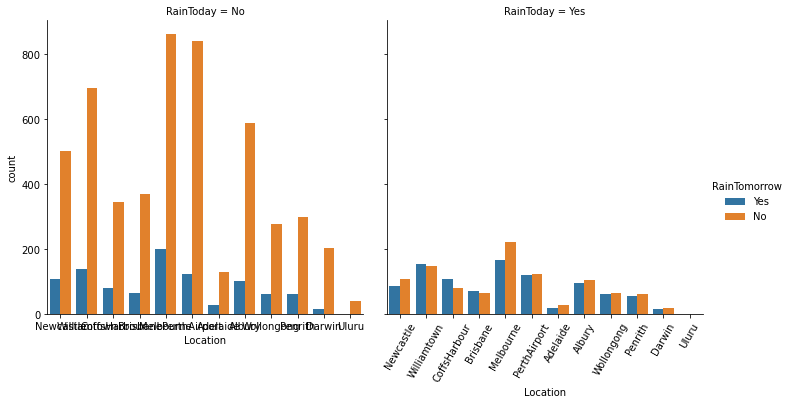

In [12]:
sns.factorplot(x= 'Location' ,col='RainToday', data=df,kind='count', hue='RainTomorrow', height=5, aspect=1)
plt.xticks(rotation = 60)
plt.show()

As per observation, in most of location, if there is no RainToday than no RainTommorrow, but very less chances it have RainTommorw.

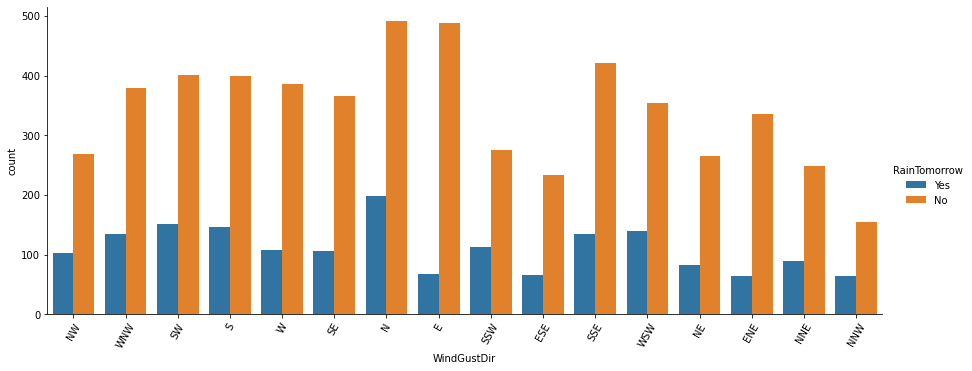

In [13]:
sns.factorplot(x='WindGustDir', data=df, kind='count', hue='RainTomorrow', height=5, aspect=2.5)
plt.xticks(rotation = 60)
plt.show()

As per observation, Maximum possibity to have RainTomorrow, when "WindGustDir" is N, otherwise it is average to have Rainfall.

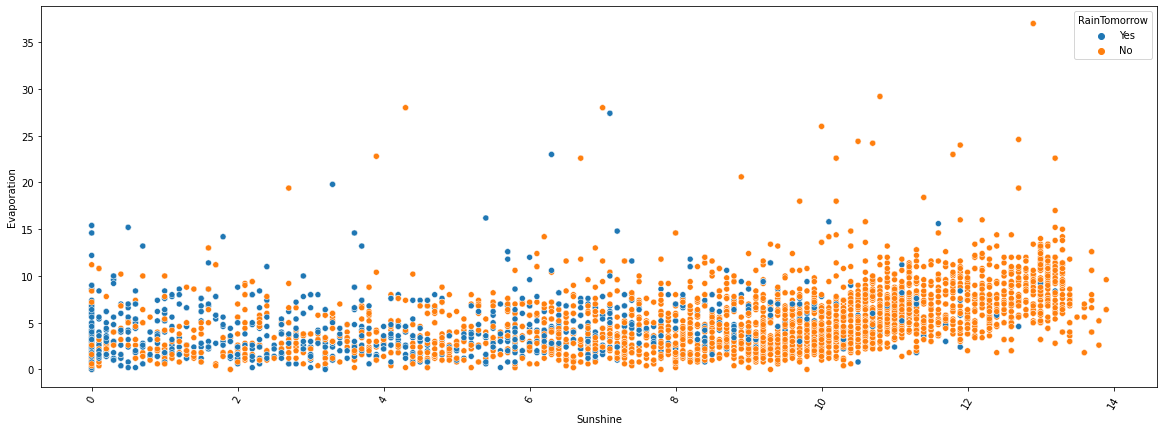

In [14]:
plt.figure (figsize=(20,7))
sns.scatterplot(y='Evaporation' ,x='Sunshine',data=df ,hue='RainTomorrow')
plt.xticks(rotation = 60)
plt.show()

As per observation, as Sunshine is increses the possiblity of RainTommow is decreses, and that time Evaporation mostly between 0 to 10.

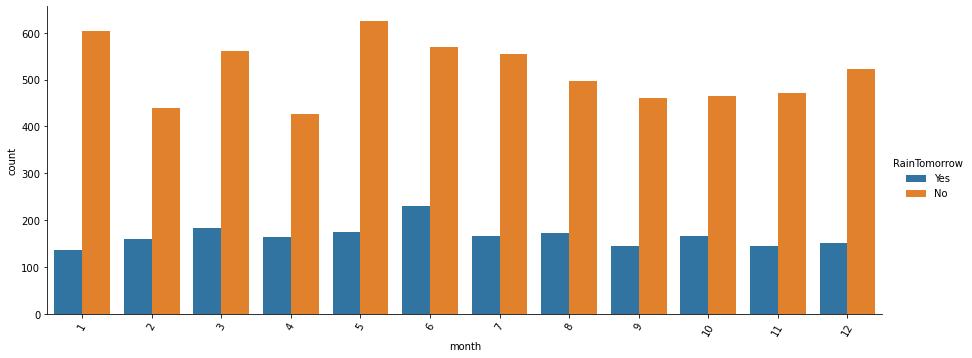

In [15]:
sns.factorplot(x='month', data=df, kind='count', hue='RainTomorrow', height=5, aspect=2.5)
plt.xticks(rotation = 60)
plt.show()

As per observation, In the month of June the possibility to predicte RainTommorrow, otherwise no any heavy rain fall.

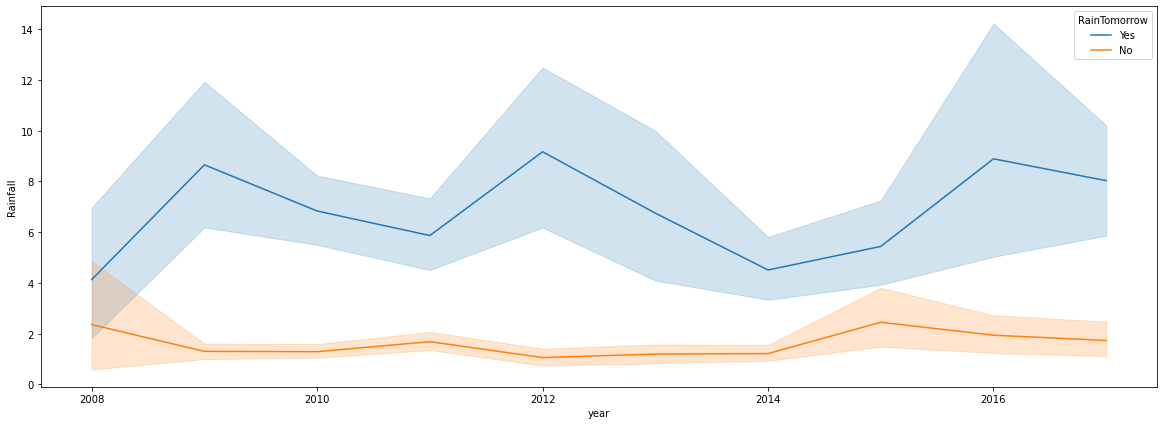

In [16]:
plt.figure (figsize=(20,7))
sns.lineplot(data=df, x='year', y='Rainfall', hue='RainTomorrow')
plt.show()

As per observation, Rainfall is high in the 2009, 2012 and 2016 years.

In [17]:
print (numeric_datatypes)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


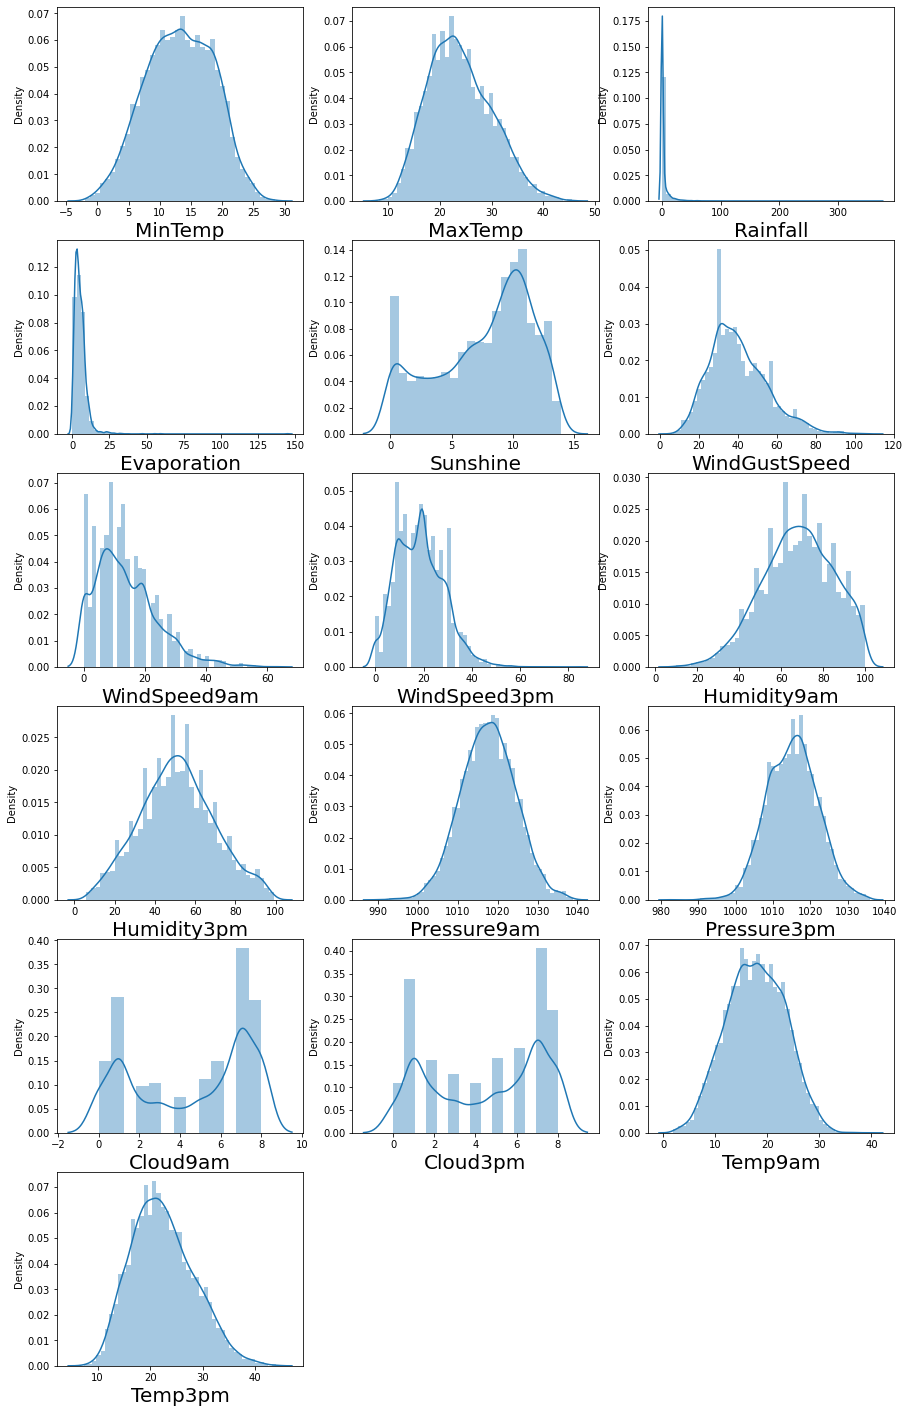

In [18]:
Conti_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
                  'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
                  'Temp9am', 'Temp3pm']

plt.figure (figsize=(15,25))
plotnumber = 1

for column in Conti_features:
    if plotnumber<=16:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

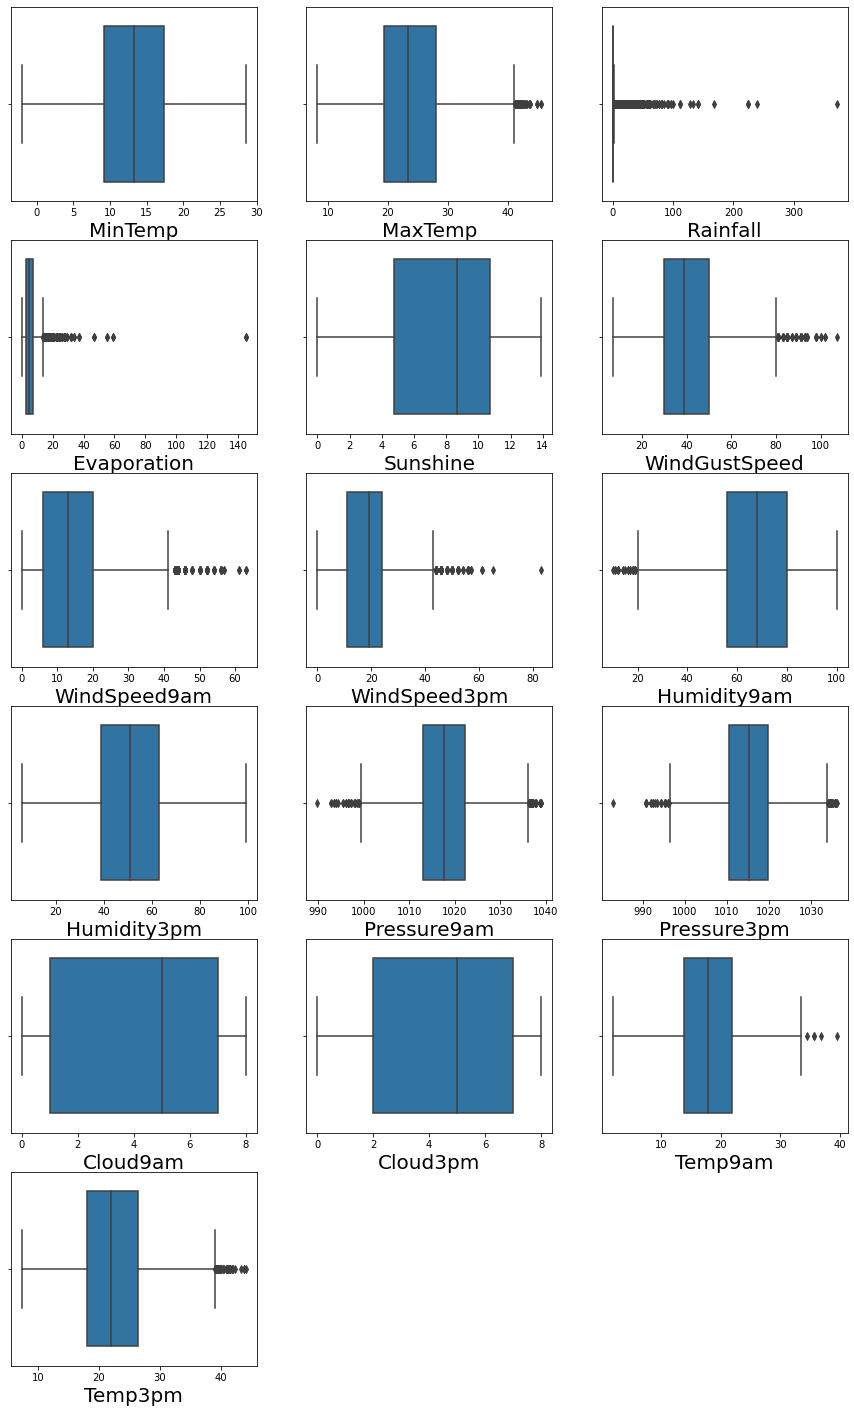

In [19]:
plt.figure (figsize=(15,25))
plotnumber = 1

for column in Conti_features:
    if plotnumber<=16:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

As per observation, many continuous features have outliers, will handle later.

In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,2012.102433,6.442136,15.741958
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,2.473137,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,2010.000000,3.000000,8.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,2011.000000,6.000000,16.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


As per observation Rainfall, Evaporaion have many outliers.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8425 entries, 1696 to 363
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9a

In [22]:
df.shape

(8425, 25)

# Handle Null Value

In [23]:
for i in object_datatypes:
    df[i] = df[i].fillna(df[i].mode()[0])

In [24]:
for i in numeric_datatypes:
    df[i] = df[i].fillna(df[i].mean())

Both Temp 9am and 3pm has the same trend. We will create a new Columns, by concating the two columns

In [25]:
df['Avg_WindSpeed']=(df['WindSpeed9am']+df['WindSpeed3pm'])/2

df['Avg_Humidity']=(df['Humidity9am']+df['Humidity3pm'])/2

df['Avg_Cloud']=(df['Cloud9am']+df['Cloud3pm'])/2

df['Avg_Temp'] = (df['Temp9am']+df['Temp3pm'])/2

df['Avg_Pressure']=(df['Pressure9am']+df['Pressure3pm'])/2

In [26]:
df = df.drop(columns = ['WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 
                            'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm'], axis=1)


# Since the dataset has a lot of string vales. We will use the encoding techniques to convert the sring data to numerical data.

In [27]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [28]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i])

In [29]:
df.isnull().sum().sum()

0

In [30]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,year,month,day,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
1696,6,13.6,32.0,0.0,5.389395,7.632205,3,40.174469,4,4,0,1,2013,12,4,3.0,56.0,5.000000,25.85,1016.438154
3082,10,9.0,15.0,0.2,4.200000,7.632205,7,91.000000,7,7,0,1,2016,7,6,52.0,52.5,4.283311,13.50,1005.950000
1139,3,17.0,22.6,8.6,1.400000,4.000000,3,40.174469,11,4,1,0,2009,10,28,12.0,72.0,6.000000,20.45,1024.300000
3070,10,8.8,19.3,0.0,2.400000,7.632205,14,85.000000,7,14,0,0,2016,6,24,37.0,38.5,4.534902,16.45,1004.700000
6225,2,14.3,24.9,0.0,4.000000,9.600000,12,19.000000,12,13,0,0,2011,5,6,6.5,48.0,6.000000,21.45,1018.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,10,19.5,25.6,0.4,5.389395,7.632205,8,70.000000,12,11,0,1,2017,3,6,35.0,63.0,4.000000,22.85,1011.700000
3099,10,15.0,18.9,0.0,5.389395,7.632205,14,91.000000,14,14,0,0,2016,7,23,51.0,30.0,4.534902,17.75,1004.800000
6321,2,5.6,22.8,0.0,6.000000,10.100000,14,33.000000,5,13,0,0,2011,8,10,8.5,35.0,0.500000,19.35,1009.900000
4002,10,7.0,20.4,0.0,18.400000,7.632205,10,33.000000,14,2,0,0,2016,9,12,17.5,69.0,4.534902,17.45,1019.800000


# correlation of one variable vs all other variables, or multicorelation

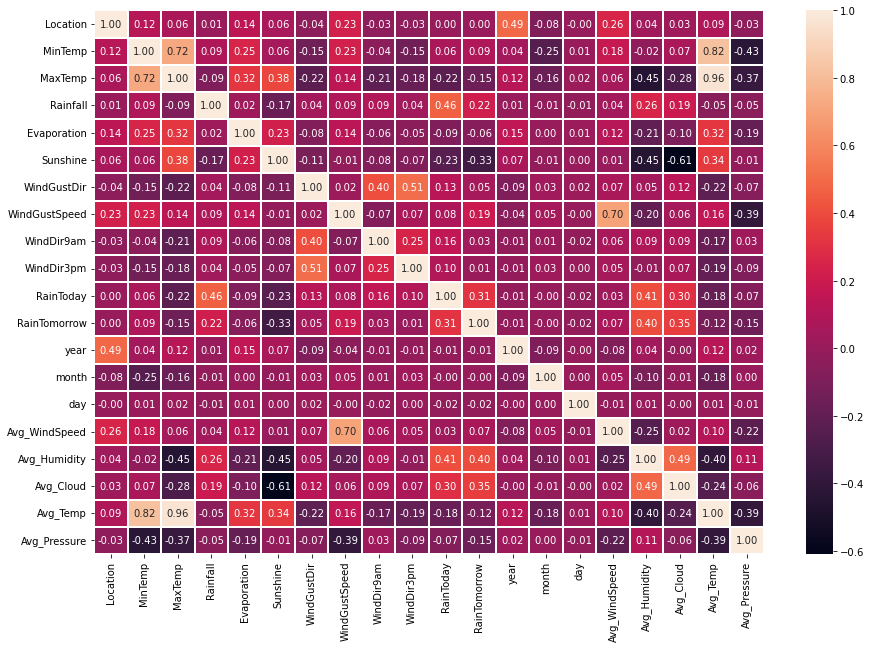

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, linewidths=0.1,fmt="0.2f")
plt.show()

# [1] Classification Problem (Target = RainTomorrow)

## Now Check correlation of the columns with the target column

In [32]:
df.corr()['RainTomorrow'].sort_values()

Sunshine        -0.327731
MaxTemp         -0.152886
Avg_Pressure    -0.151145
Avg_Temp        -0.115905
Evaporation     -0.059012
day             -0.015461
year            -0.011066
month           -0.001243
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
Avg_WindSpeed    0.069145
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
RainToday        0.312929
Avg_Cloud        0.350156
Avg_Humidity     0.400295
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

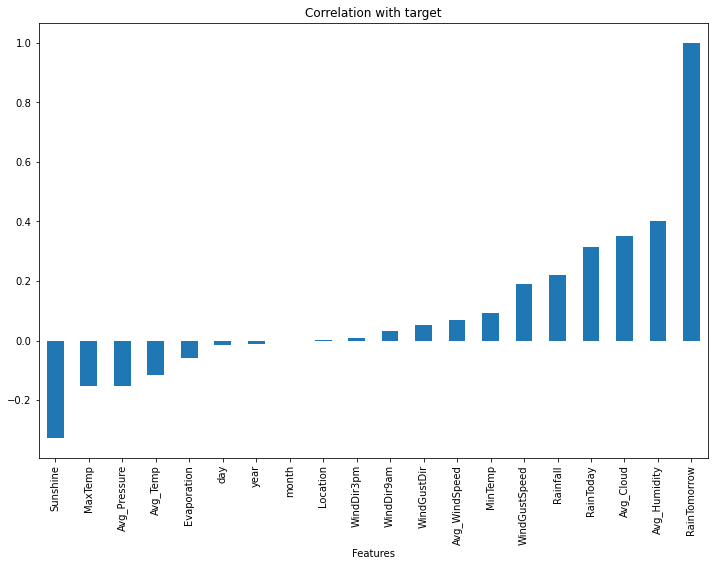

In [33]:
plt.figure(figsize=(12,8))
df.corr()['RainTomorrow'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.title('Correlation with target')
plt.show()

## Now Separting columns into features and target

In [35]:
x=df.drop(columns='RainTomorrow')
y=df.RainTomorrow
x.skew().sort_values()

Sunshine         -0.716525
Avg_Cloud        -0.374727
Avg_Humidity     -0.151055
WindDir3pm       -0.119847
MinTemp          -0.089989
Location         -0.050456
day               0.004260
Avg_Pressure      0.005032
month             0.039388
WindGustDir       0.119640
Avg_Temp          0.170653
WindDir9am        0.172792
MaxTemp           0.380654
year              0.418663
Avg_WindSpeed     0.644306
WindGustSpeed     0.757000
RainToday         1.242362
Rainfall         13.218403
Evaporation      14.023948
dtype: float64

Dataset is very skewed, let's try to handle it or save it.

## Now use PowerTransformation method to save our skewed data

In [36]:
from sklearn.preprocessing import PowerTransformer

df_pt = PowerTransformer()
df_pw = pd.DataFrame(df_pt.fit_transform(x),columns=x.columns)
df_pw.skew().sort_values()

WindDir3pm      -0.248689
day             -0.211250
Avg_Cloud       -0.192919
WindGustDir     -0.187177
Location        -0.186657
month           -0.155749
WindDir9am      -0.155025
MinTemp         -0.102983
Sunshine        -0.075544
Avg_Humidity    -0.047725
Avg_Temp        -0.029065
Avg_WindSpeed   -0.023574
MaxTemp         -0.010591
year             0.000000
Avg_Pressure     0.000947
WindGustSpeed    0.010481
Evaporation      0.080305
Rainfall         0.904387
RainToday        1.242362
dtype: float64

Using power transformation, most of skewness has removed

In [37]:
x1=['Avg_WindSpeed', 'Avg_Humidity', 'Avg_Cloud', 'Avg_Temp', 'Avg_Pressure', 'MinTemp', 'Sunshine', 'MaxTemp', 'Evaporation',
    'WindGustSpeed']

## Now remove remaining outliers using z-score technique

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df_pw[['Avg_WindSpeed', 'Avg_Humidity', 'Avg_Cloud', 'Avg_Temp', 'Avg_Pressure', 'MinTemp', 'Sunshine', 
                       'MaxTemp', 'Evaporation', 'WindGustSpeed']]))
threshold=3
outliers_df=np.where(z>3)
outliers_df

(array([   1,   47,   86,  115,  128,  136,  184,  210,  248,  248,  249,
         253,  317,  318,  393,  420,  435,  451,  459,  506,  518,  560,
         632,  664,  683,  687,  715,  737,  742,  807,  810,  884,  914,
         937,  946,  986, 1016, 1069, 1103, 1126, 1163, 1191, 1206, 1214,
        1302, 1310, 1384, 1390, 1478, 1479, 1521, 1572, 1602, 1625, 1678,
        1743, 1863, 1923, 2031, 2032, 2034, 2107, 2167, 2174, 2222, 2224,
        2235, 2278, 2489, 2589, 2681, 2781, 2794, 2822, 2878, 2885, 2915,
        2931, 3000, 3008, 3059, 3084, 3109, 3114, 3120, 3135, 3160, 3161,
        3166, 3205, 3232, 3397, 3398, 3448, 3487, 3628, 3630, 3796, 3894,
        3944, 3946, 4001, 4092, 4158, 4225, 4242, 4245, 4264, 4274, 4276,
        4379, 4426, 4482, 4482, 4663, 4700, 4748, 4800, 4866, 4871, 4876,
        4983, 5051, 5066, 5081, 5158, 5260, 5287, 5304, 5312, 5402, 5435,
        5660, 5719, 5729, 5733, 5738, 5744, 5769, 5893, 5988, 6043, 6122,
        6152, 6159, 6168, 6244, 6275, 

In [42]:
df_new= df.drop(df.index[outliers_df[0]])

print('percentage of loss of data by zscore is :',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

percentage of loss of data by zscore is : 2.4094955489614245


In [43]:
df_new.shape

(8222, 20)

Very less data, we have loss using z-tarnsformation method, let's proceed further.

In [44]:
x_new=df_new.drop(columns='RainTomorrow')
y_new=df_new.RainTomorrow

In [45]:
df_new.RainTomorrow.value_counts()

0    6292
1    1930
Name: RainTomorrow, dtype: int64

It has been observed that our target 'Loan_Status' has an imbalance data. So, we’ll try to resample the data.

# SMOTE smapling

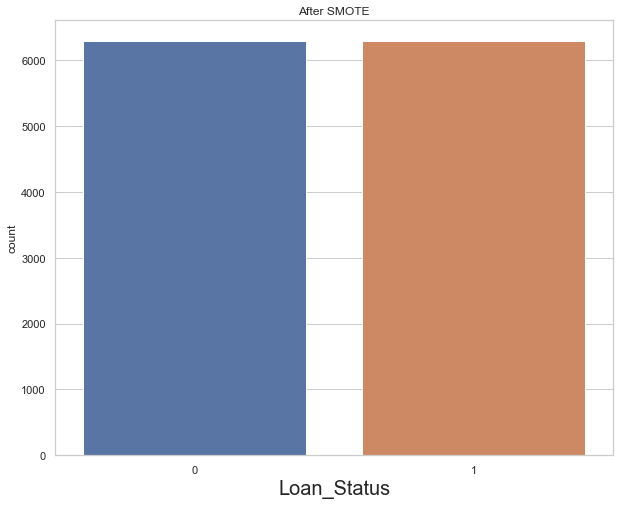

In [47]:
#Synthetic Minority Oversampling Technique (SMOTE)
#It is a statistical technique for increasing the number of cases in your dataset in a balanced way. 

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'not majority', random_state = 29)
x_res, y_res = sm.fit_resample(x_new, y_new)
y_res_df = pd.DataFrame(y_res)

plt.figure(figsize=(10,8))

sns.set(style = 'whitegrid')
sns.countplot(y_res_df.RainTomorrow).set_title('After SMOTE')
plt.xlabel('Loan_Status',fontsize=20)
plt.show()

In [48]:
x_res.shape

(12584, 19)

In [49]:
y_res_df.shape

(12584, 1)

# Data Scaling using Standard Scaler

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_res)
x_scaled

array([[ 0.08901043,  0.00903668,  1.46211236, ...,  0.00388525,
         1.13518391,  0.08278746],
       [-0.88640953,  0.65854779, -0.12340313, ...,  0.50075397,
         0.13040981,  1.40668582],
       [ 1.38957037, -0.9079202 , -0.68002027, ..., -0.2272072 ,
        -0.61386729, -1.89386319],
       ...,
       [ 1.38957037, -0.92691052, -0.89349401, ..., -0.46339459,
        -0.8503769 , -0.40277624],
       [ 0.7392904 ,  0.00927616, -0.52800414, ...,  0.74957764,
        -0.38129528, -0.58066967],
       [ 0.41415042, -0.00477084, -1.0517955 , ...,  0.62576182,
        -0.46947947, -0.38312971]])

## PCA : Principal Component Analysis

                    PC1   PC2   PC3   PC4   PC5   PC6  PC7   PC8   PC9  PC10  \
Explained_Variance  3.9  2.44  2.07  1.59  1.43  1.08  1.0  0.89  0.77  0.69   

                    PC11  PC12  PC13  PC14  PC15  PC16  PC17  PC18  PC19  
Explained_Variance  0.61  0.55  0.48  0.43  0.36  0.32  0.26  0.11  0.02  


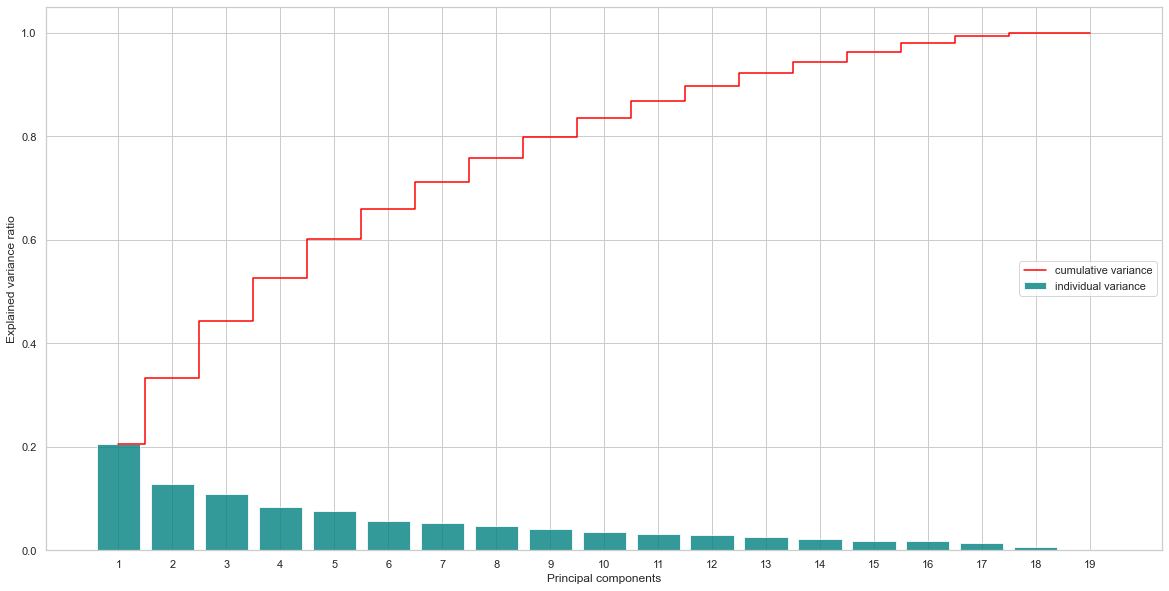

In [51]:
# Performing PCA
from sklearn.decomposition import PCA

pca = PCA(random_state = 1)
pca.fit(x_scaled)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["PC" + str(i) for i in range(1,20)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(20,10))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [52]:
pca_red = PCA(n_components=17)
X_reduced = pca_red.fit_transform(x_scaled)

As per PCA observation the first 17 components account for about 99% of the total explained variance. The dataset can reduced with 17 components and proceed further.

In [57]:
XC=X_reduced
yc=y_res_df

# Model Development

In [58]:
#import the necessary model algos.

#classifiaction
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [59]:
LC = LogisticRegression()
DTC = DecisionTreeClassifier()
KNNC= KNeighborsClassifier()
RFC = RandomForestClassifier()
SVc = SVC()
GRAC= GradientBoostingClassifier()
ADAC= AdaBoostClassifier()
GNBC= GaussianNB()
SGDC= SGDClassifier()
XGBC= XGBClassifier()

In [60]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(), SVC(),
       GradientBoostingClassifier(),AdaBoostClassifier(),GaussianNB(),SGDClassifier(),XGBClassifier()]

models=['LC=LogisticRegression','DTC=DecisionTreeClassifier','KNNC=KNeighborsClassifier','RFC=RandomForestClassifier',
        'SVc=SVC()','GRAC=GradientBoostingClassifier','ADAC=AdaBoostClassifier','GNBC=GaussianNB', 'SGDC=SGDClassifier()',
        'XGBC=XGBClassifier()']

acc_result=[]
train_result=[]

x_train,x_test,y_train,y_test=train_test_split(XC,yc,test_size=0.20,random_state=29)

for i in range(len(model)):
    clf=model[i]
    clf.fit(x_train,y_train)
    
    x_pred=clf.predict(x_train)
    y_pred=clf.predict(x_test)
    
    train_result.append(round (accuracy_score(y_train,x_pred)*100,2))
    acc_result.append(round (accuracy_score(y_pred,y_test)*100,2))

Result_df=pd.DataFrame({'Model Name':models, 'Training Score:':train_result ,'Accuracy Score (without tuning)':acc_result})
Result_df

,Model Name,Training Score:,Accuracy Score (without tuning)
0,LC=LogisticRegression,75.81,76.76
1,DTC=DecisionTreeClassifier,100.00,85.06
2,KNNC=KNeighborsClassifier,90.50,86.02
3,RFC=RandomForestClassifier,100.00,91.97
4,SVc=SVC(),87.30,84.66
5,GRAC=GradientBoostingClassifier,83.06,80.93
6,ADAC=AdaBoostClassifier,78.25,77.63
7,GNBC=GaussianNB,74.46,75.13
8,SGDC=SGDClassifier(),74.09,74.22
9,XGBC=XGBClassifier(),99.50,90.98


# 1. Logistic Regression:

In [61]:
acc_train=[]
acc_test=[]

for i in range (0,1000):
    x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.20, random_state=i)
    
    lc = LogisticRegression()
    lc.fit(x_train,y_train)
    
    x_lc_predict=lc.predict(x_train)
    y_lc_predict=lc.predict(x_test)
    
    acc_train.append(accuracy_score(y_train,x_lc_predict))
    acc_test.append(accuracy_score(y_test,y_lc_predict))
    

acc_train_index= acc_train.index(max(acc_train))    
print("Index of max vaule of train's accuracy_score at random_state:",acc_train_index)

acc_test_index= acc_test.index(max(acc_test))
print("Index of max vaule of test's accuracy_score at random_state:",acc_test_index)

Index of max vaule of train's accuracy_score at random_state: 208
Index of max vaule of test's accuracy_score at random_state: 851


Always choose best training score for random_state, because
1. if training score >= testing score ==> chance of best fit or undetfit
2. if training score << testing score ==> overfit
3. if training score >> testing score ==> underfit

In [62]:
kford_cv=KFold(n_splits=10,shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.21, random_state=851)
    
lc.fit(x_train,y_train)
x_lc_predict=lc.predict(x_train)
y_lc_predict=lc.predict(x_test)
lc_cv = cross_val_score(lc,XC,yc,cv=kford_cv, scoring='accuracy')
    
print ("The training accurancy @ 851 random_state is:",accuracy_score(y_train,x_lc_predict))
print ("The testing accurancy @ 851 ranom_state is:",accuracy_score(y_test,y_lc_predict))
print ("Cross Validation: ", lc_cv.mean())
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_lc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_lc_predict))

The training accurancy @ 851 random_state is: 0.7531435469268686
The testing accurancy @ 851 ranom_state is: 0.7805524025728339
Cross Validation:  0.7352162048513028

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1320
           1       0.78      0.78      0.78      1323

    accuracy                           0.78      2643
   macro avg       0.78      0.78      0.78      2643
weighted avg       0.78      0.78      0.78      2643


 Conconfusion_matrix:
 [[1028  292]
 [ 288 1035]]


# 2. Decision Tree:

In [63]:
kford_val=KFold(n_splits=10)

grid_param = {
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_features':['auto','sqrt','log2'],
            'max_depth': [10,20,30,40,50],
            'min_samples_leaf': range (2,6), 
            'min_samples_split': range (3,8),
            'max_leaf_nodes': range (5,10)} 
    
grid_search = GridSearchCV (DTC, param_grid = grid_param, cv=kford_val, n_jobs = -1)
# n_jobs : Use all the cores in your system. For performance improvement.
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8),
                         'splitter': ['best', 'random']})

In [64]:
#Initiate DecisitionTreeClassifier with new parametes and train
dtc=grid_search.best_estimator_

# Train the model
dtc.fit(x_train,y_train)

x_dtc_predict=dtc.predict(x_train)
y_dtc_predict=dtc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_dtc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_dtc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_dtc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_dtc_predict))

The training accurancy is: 0.70385273111357
The testing accurancy is: 0.7158531971244798

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1320
           1       0.72      0.70      0.71      1323

    accuracy                           0.72      2643
   macro avg       0.72      0.72      0.72      2643
weighted avg       0.72      0.72      0.72      2643


 Conconfusion_matrix:
 [[966 354]
 [397 926]]


# 3. K-Nearest Neighbour:

In [65]:
neighbors = [i for i in range(1,10)]
parameter_grid = { 'algorithm' : ['auto','ball_tree','kd_tree', 'brute'],
                   'weights':['uniform', 'distance'],
                   'leaf_size' : [3,5,6,7,8,10],
                   'n_neighbors': neighbors}
gridsearch = GridSearchCV(KNNC, param_grid=parameter_grid, cv=kford_val)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8, 10],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [66]:
#Initiate KNN with new parametes and train
knnc=gridsearch.best_estimator_

# Train the model
knnc.fit(x_train,y_train)

x_knnc_predict=knnc.predict(x_train)
y_knnc_predict=knnc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_knnc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_knnc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_knnc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_knnc_predict))

The training accurancy is: 1.0
The testing accurancy is: 0.9243284146802876

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      1320
           1       0.89      0.98      0.93      1323

    accuracy                           0.92      2643
   macro avg       0.93      0.92      0.92      2643
weighted avg       0.93      0.92      0.92      2643


 Conconfusion_matrix:
 [[1153  167]
 [  33 1290]]


# 4. Random forest:

In [67]:
params = {  'n_estimators' : [10,50,100,200,],
            'criterion':['gini','entropy'],
            'max_depth': [10,15,45,80,], 
            'min_samples_leaf': [5,6],
            'min_samples_split': [10,11], 
            'max_leaf_nodes': range (5,10)}

gridsearch_rfc = GridSearchCV(RFC, param_grid=params,cv=kford_val, n_jobs = -1)
gridsearch_rfc.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 45, 80],
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [10, 50, 100, 200]})

In [68]:
#Initiate RandomForestClassifier with new parametes and train
rfc=gridsearch_rfc.best_estimator_

# Train the model
rfc.fit(x_train,y_train)

x_rfc_predict=rfc.predict(x_train)
y_rfc_predict=rfc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_rfc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_rfc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_rfc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_rfc_predict))

The training accurancy is: 0.759682124534755
The testing accurancy is: 0.7680665909950813

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      1320
           1       0.76      0.78      0.77      1323

    accuracy                           0.77      2643
   macro avg       0.77      0.77      0.77      2643
weighted avg       0.77      0.77      0.77      2643


 Conconfusion_matrix:
 [[ 994  326]
 [ 287 1036]]


# 5. SVC

In [69]:
#Initiate RandomForestClassifier with new parametes and train
svc=SVC(gamma='auto')

# Train the model
svc.fit(x_train,y_train)

x_svc_predict=svc.predict(x_train)
y_svc_predict=svc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_svc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_svc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_svc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_svc_predict))

The training accurancy is: 0.8773765214767126
The testing accurancy is: 0.8615209988649262

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1320
           1       0.85      0.87      0.86      1323

    accuracy                           0.86      2643
   macro avg       0.86      0.86      0.86      2643
weighted avg       0.86      0.86      0.86      2643


 Conconfusion_matrix:
 [[1121  199]
 [ 167 1156]]


# 6. Gradient Boosting Classifier:

In [70]:
#Initiate RandomForestClassifier with new parametes and train
grac=GradientBoostingClassifier(learning_rate= 0.01)

# Train the model
grac.fit(x_train,y_train)

x_grac_predict=grac.predict(x_train)
y_grac_predict=grac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_grac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_grac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_grac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_grac_predict))

The training accurancy is: 0.7499245548737552
The testing accurancy is: 0.7548240635641317

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      1320
           1       0.76      0.75      0.75      1323

    accuracy                           0.75      2643
   macro avg       0.75      0.75      0.75      2643
weighted avg       0.75      0.75      0.75      2643


 Conconfusion_matrix:
 [[1008  312]
 [ 336  987]]


# 7 AdaBoost Classifier:

In [71]:
#Initiate RandomForestClassifier with new parametes and train
adac=AdaBoostClassifier(learning_rate= 0.01, base_estimator=RandomForestClassifier())

# Train the model
adac.fit(x_train,y_train)

x_adac_predict=adac.predict(x_train)
y_adac_predict=adac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_adac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_adac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_adac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_adac_predict))

The training accurancy is: 1.0
The testing accurancy is: 0.9084373817631479

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1320
           1       0.91      0.91      0.91      1323

    accuracy                           0.91      2643
   macro avg       0.91      0.91      0.91      2643
weighted avg       0.91      0.91      0.91      2643


 Conconfusion_matrix:
 [[1198  122]
 [ 120 1203]]


# 8 GaussianNB:

In [72]:
#Initiate RandomForestClassifier with new parametes and train
gnbc=GaussianNB()

# Train the model
gnbc.fit(x_train,y_train)

x_gnbc_predict=gnbc.predict(x_train)
y_gnbc_predict=gnbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_gnbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_gnbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_gnbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_gnbc_predict))

The training accurancy is: 0.7400663917110955
The testing accurancy is: 0.757094211123723

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.79      0.77      1320
           1       0.78      0.72      0.75      1323

    accuracy                           0.76      2643
   macro avg       0.76      0.76      0.76      2643
weighted avg       0.76      0.76      0.76      2643


 Conconfusion_matrix:
 [[1046  274]
 [ 368  955]]


# 9 SGDClassifier:

In [73]:
#Initiate RandomForestClassifier with new parametes and train
sgdc=SGDClassifier(alpha=0.001)

# Train the model
sgdc.fit(x_train,y_train)

x_sgdc_predict=sgdc.predict(x_train)
y_sgdc_predict=sgdc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_sgdc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_sgdc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_sgdc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_sgdc_predict))

The training accurancy is: 0.7516346444019716
The testing accurancy is: 0.7642830117290957

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.80      0.77      1320
           1       0.78      0.73      0.76      1323

    accuracy                           0.76      2643
   macro avg       0.77      0.76      0.76      2643
weighted avg       0.77      0.76      0.76      2643


 Conconfusion_matrix:
 [[1050  270]
 [ 353  970]]


# 10 XGBClassifier:

In [74]:
#Initiate RandomForestClassifier with new parametes and train
xgbc=XGBClassifier(n_estimators = 10, learning_rate = 1.5)

# Train the model
xgbc.fit(x_train,y_train)

x_xgbc_predict=xgbc.predict(x_train)
y_xgbc_predict=xgbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_xgbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_xgbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_xgbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_xgbc_predict))

The training accurancy is: 0.9212352882003823
The testing accurancy is: 0.8278471433976542

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1320
           1       0.82      0.84      0.83      1323

    accuracy                           0.83      2643
   macro avg       0.83      0.83      0.83      2643
weighted avg       0.83      0.83      0.83      2643


 Conconfusion_matrix:
 [[1076  244]
 [ 211 1112]]


In [79]:
Acc_Score_tun =[round (accuracy_score(y_test,y_lc_predict)*100,2),
                round (accuracy_score(y_test,y_dtc_predict)*100,2),
                round (accuracy_score(y_test,y_knnc_predict)*100,2),
                round (accuracy_score(y_test,y_rfc_predict)*100,2),
                round (accuracy_score(y_test,y_svc_predict)*100,2),
                round (accuracy_score(y_test,y_grac_predict)*100,2),
                round (accuracy_score(y_test,y_adac_predict)*100,2),
                round (accuracy_score(y_test,y_gnbc_predict)*100,2),
                round (accuracy_score(y_test,y_sgdc_predict)*100,2),
                round (accuracy_score(y_test,y_xgbc_predict)*100,2)]
Weather_Prediction_RainTomorrow = pd.DataFrame({'Classifier':['lc= LogisticRegression()', 'dtc = DecisionTreeClassifier()',
                                 'knnc = KNeighborsClassifier()','rfc = RandomForestClassifier()','svc=SVC()',
                                 'grac = GradientBoostingClassifier()', 'adac=AdaBoostClassifier','gnbc=GaussianNB', 
                                  'sgdc=SGDClassifier()', 'xgbc=XGBClassifier()'], 
                                 
                                'Accuracy Score (with tuning)':Acc_Score_tun})
Weather_Prediction_RainTomorrow

,Classifier,Accuracy Score (with tuning)
0,lc= LogisticRegression(),78.06
1,dtc = DecisionTreeClassifier(),71.59
2,knnc = KNeighborsClassifier(),92.43
3,rfc = RandomForestClassifier(),76.81
4,svc=SVC(),86.15
5,grac = GradientBoostingClassifier(),75.48
6,adac=AdaBoostClassifier,90.84
7,gnbc=GaussianNB,75.71
8,sgdc=SGDClassifier(),76.43
9,xgbc=XGBClassifier(),82.78


In [80]:
WEATHER_PREDICTION_RAIN_TOMORROW= pd.concat([Result_df,Weather_Prediction_RainTomorrow],axis=1)
WEATHER_PREDICTION_RAIN_TOMORROW

,Model Name,Training Score:,Accuracy Score (without tuning),Classifier,Accuracy Score (with tuning)
0,LC=LogisticRegression,75.81,76.76,lc= LogisticRegression(),78.06
1,DTC=DecisionTreeClassifier,100.00,85.06,dtc = DecisionTreeClassifier(),71.59
2,KNNC=KNeighborsClassifier,90.50,86.02,knnc = KNeighborsClassifier(),92.43
3,RFC=RandomForestClassifier,100.00,91.97,rfc = RandomForestClassifier(),76.81
4,SVc=SVC(),87.30,84.66,svc=SVC(),86.15
5,GRAC=GradientBoostingClassifier,83.06,80.93,grac = GradientBoostingClassifier(),75.48
6,ADAC=AdaBoostClassifier,78.25,77.63,adac=AdaBoostClassifier,90.84
7,GNBC=GaussianNB,74.46,75.13,gnbc=GaussianNB,75.71
8,SGDC=SGDClassifier(),74.09,74.22,sgdc=SGDClassifier(),76.43
9,XGBC=XGBClassifier(),99.50,90.98,xgbc=XGBClassifier(),82.78


# We are gettig high model accuracy: 92.43% with KNeighborsClassifier model with tuning, which shows model is performing exremely well, so we can save this model.

# Save the model using pickle

In [103]:
import pickle
pickle.dump(knnc,open('WEATHER_FORECASTING-RAIN_TOMORROW-ClassificationModel','wb'))

# [2] Regression Problem (Target = Rainfall)


## Now seperate features and target variables.

In [105]:
x_r = df.drop(['Rainfall'], axis=1)
y_r = df['Rainfall']

print(x_r.shape)
print(y_r.shape)

(6255, 17)
(6255,)


In [106]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Pressure     True
dtype: bool
****************************************
Low Side Outliers Present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Pressure     True
dtype: bool


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xr_scaled = scaler.fit_transform(x_r)

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(xr_scaled, i) for i in range (xr_scaled.shape[1])]

vif['features'] = x_r.columns


# Lets check the values 
vif

,vif,features
0,1.591126,Location
1,3.644337,MinTemp
2,3.968600,MaxTemp
3,1.186778,Evaporation
4,1.637787,Sunshine
5,1.544190,WindGustDir
6,1.927823,WindGustSpeed
7,1.276512,WindDir9am
8,1.440392,WindDir3pm
9,1.322082,RainToday


There is no multicollinearity in the dataset.

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [110]:
max_r2_score = 0
maxRS = 0
model = [LinearRegression(),
         DecisionTreeRegressor(),
         KNeighborsRegressor(),
         RandomForestRegressor(),
         xgb.XGBRegressor(),
         SVR()]

for rs in range(1,200):
    xr_train, xr_test, yr_train, yr_test = train_test_split(xr_scaled, y_r, test_size = 0.25, random_state = rs)
    for ir in model:
        ir.fit(xr_train, yr_train)
        yr_pred = ir.predict(xr_test)
        r2score = r2_score( yr_test,yr_pred)
        print('r2_score', r2score*100,'%', 'random_state', rs, 'Model', ir)
        if r2score > max_r2_score:
            max_r2_score = r2score
            maxRS = rs
            final_model = ir

            
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

r2_score 80.72804564227182 % random_state 1 Model LinearRegression()
r2_score 77.28007838016502 % random_state 1 Model DecisionTreeRegressor()
r2_score 79.28297086285211 % random_state 1 Model KNeighborsRegressor()
r2_score 87.04468551549682 % random_state 1 Model RandomForestRegressor()
r2_score 86.58829154185173 % random_state 1 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
    

In [111]:
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

max R2 score corresponds to random state:  23 is 0.9134539944044737 and Model is:  RandomForestRegressor()


In [112]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(yr_test, yr_pred))
print('MSE:', metrics.mean_squared_error(yr_test, yr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

MAE: 0.2265338386090994
MSE: 0.16643856673807222
RMSE: 0.4079688305962506


### Parameter Tuning using GridSearchCV

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(1,100, 10),
              "n_estimators": np.arange(1,200, 10)}

rf = RandomForestRegressor()

grd = GridSearchCV(rf, param_grid = param_grid)
grd.fit(xr_train, yr_train)

print('Best Param ==>', grd.best_params_)

rf = grd.best_estimator_

rf.fit(xr_train, yr_train)
yr_pred = rf.predict(xr_test)


print('R2 Score: ', rf.score(xr_test, yr_test))

print('Mean Squared Error: ', mean_squared_error(yr_test, yr_pred))

Best Param ==> {'max_depth': 41, 'n_estimators': 191}
R2 Score:  0.8880814819338959
Mean Squared Error:  0.10602574225719207


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

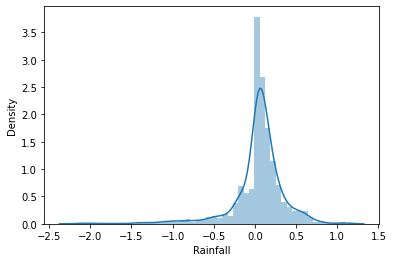

In [114]:
#checking distribution on the test dataset
sns.distplot(rf.predict(xr_test) - yr_test)

we are getting a normal distribution curve which means that our model Random Forest Regressor is performing correctly.

# We are gettig high model accuracy: 91.34% with RandomForestRegressor model without tuning, which shows model is performing exremely well, so we can save this model.

# Save the model using pickle

In [115]:
import pickle
pickle.dump(rf,open('WEATHERE_FORECASTING_RAINFALL_-RegressorModel','wb'))